<a href="https://colab.research.google.com/github/dansarmiento/MachineLearning/blob/main/TikTok_regression_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is focused on how different variables are associated with whether a user is verified.  In a previous project we observed that verified users are much more likely to post opinions.  We will explore how to predict verified status using logistic regression

In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#https://docs.google.com/spreadsheets/d/1KG6hS23sU20fHJ4PTeXwTFA9l87oAWnDOuUPVX1-lfM/edit?usp=sharing

sheet_id = "1KG6hS23sU20fHJ4PTeXwTFA9l87oAWnDOuUPVX1-lfM"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/','_')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
df.shape

(19382, 12)

In [ ]:
# it appears there are some nulls to deal with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
df.isna().sum()

,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


In [ ]:
df.dropna(axis=0, inplace=True)

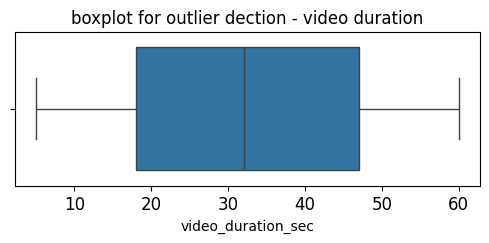

In [ ]:
# start looking for outliers with boxplots

plt.figure(figsize=(6,2))
plt.title('boxplot for outlier dection - video duration')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x = df.video_duration_sec)
plt.show()

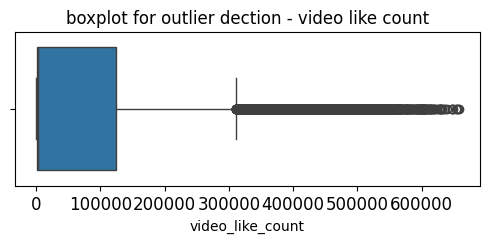

In [ ]:
plt.figure(figsize=(6,2))
plt.title('boxplot for outlier dection - video like count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x = df.video_like_count)
plt.show()

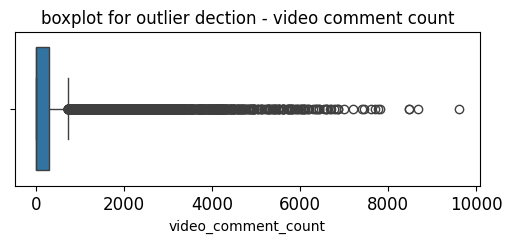

In [ ]:
plt.figure(figsize=(6,2))
plt.title('boxplot for outlier dection - video comment count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x = df.video_comment_count)
plt.show()

In [ ]:
def outlier_imputer(column_list, iqr_factor):
  for col in column_list:
    df.loc[df[col] < 0, col] = 0

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = q3 + (iqr_factor * iqr)

    print(col)
    print('Q3: ', q3)
    print('upper threshold: ', upper_threshold)

    df.loc[df[col] > upper_threshold, col] = upper_threshold

In [ ]:
outlier_imputer(['video_like_count'],1.5)

video_like_count
Q3:  125020.0
upper threshold:  311333.875


In [ ]:
outlier_imputer(['video_comment_count'],1.5)

video_comment_count
Q3:  292.0
upper threshold:  728.5


In [ ]:
df.verified_status.value_counts(normalize=True)
# with 94% of the dataset representing unverified acocunts, we will need to resample to balance the outcome variable
# this is because a biased model will predict the majority class most of the time
# the goal of resampling is to learn meaningful patterns from the minority class

,proportion
verified_status,
not verified,0.93712
verified,0.06288


In [ ]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Resampling to create more balance to learn more about the minority class

df_majority = df[df.verified_status == 'not verified']
df_minority = df[df.verified_status == 'verified']

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.verified_status.value_counts(normalize=True)

,proportion
verified_status,
not verified,0.5
verified,0.5


In [ ]:
df_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# get the average video_transcription_text length for claims and the average length for opinions
df_upsampled[['verified_status', 'video_transcription_text']].groupby('verified_status')[['video_transcription_text']].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.563017


In [ ]:
# extract the lenght of each text and add this as a column to the dataframe
df_upsampled['text_length'] = df_upsampled.video_transcription_text.apply(func=lambda text: len(text))
df_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


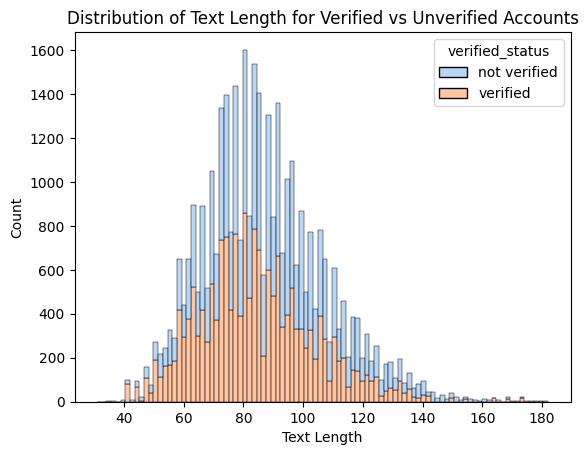

In [ ]:
# visualize the distribution of text length for videos posted by verified vs unverified accounts

sns.histplot(data=df_upsampled, stat='count', multiple='stack', x='text_length', kde=False, palette='pastel',
             hue='verified_status', element='bars', legend=True)
plt.title('Distribution of Text Length for Verified vs Unverified Accounts')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [ ]:
# next look at a correlation matrix to help determine the most correlated variables

df_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.001369,-0.011800,-0.698969,-0.626105,-0.503634,-0.489758,-0.610763,-0.196817
video_id,-0.001369,1.000000,0.013938,0.001607,0.004534,0.009136,0.006814,0.010564,-0.007634
video_duration_sec,-0.011800,0.013938,1.000000,0.013892,0.004028,0.001944,0.006930,-0.000080,-0.005043
video_view_count,-0.698969,0.001607,0.013892,1.000000,0.855343,0.710466,0.691557,0.747564,0.246867
video_like_count,-0.626105,0.004534,0.004028,0.855343,1.000000,0.832361,0.806369,0.816416,0.217852
video_share_count,-0.503634,0.009136,0.001944,0.710466,0.832361,1.000000,0.709738,0.671601,0.176362
video_download_count,-0.489758,0.006814,0.006930,0.691557,0.806369,0.709738,1.000000,0.794524,0.175287
video_comment_count,-0.610763,0.010564,-0.000080,0.747564,0.816416,0.671601,0.794524,1.000000,0.217179
text_length,-0.196817,-0.007634,-0.005043,0.246867,0.217852,0.176362,0.175287,0.217179,1.000000


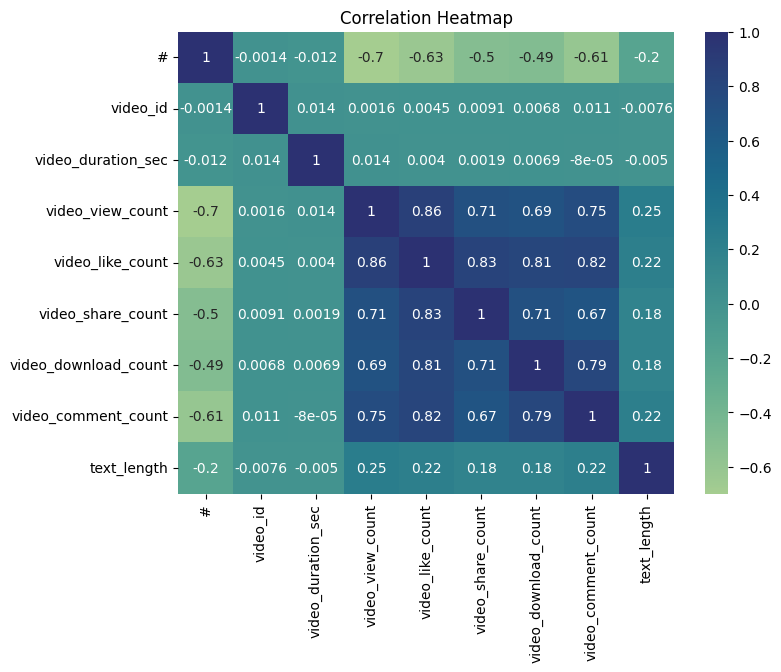

In [ ]:
# visualize the correlation heatmap to make it easier to identify

plt.figure(figsize=(8,6))
sns.heatmap(df_upsampled.corr(numeric_only=True), annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows a strong correlation (.86) between likes and views

there also should not be severe multicollinearity among features so you could exclude likes to meet the assumption requirement and keep views, shares, downloads and comments

In [ ]:
# target = verified status
y = df_upsampled.verified_status

In [ ]:
# features
X = df_upsampled[['video_duration_sec','claim_status','author_ban_status','video_view_count','video_share_count','video_download_count','video_comment_count']]
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [ ]:
X_train.dtypes

,0
video_duration_sec,int64
claim_status,object
author_ban_status,object
video_view_count,float64
video_share_count,float64
video_download_count,float64
video_comment_count,float64


In [ ]:
X_train.claim_status.unique()

array(['opinion', 'claim'], dtype=object)

In [ ]:
# need to make numeric to train a model

X_train_to_encode = X_train[['claim_status','author_ban_status']]
X_test_to_encode = X_test[['claim_status','author_ban_status']]

In [ ]:
X_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:
X_train_encoded

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
# place encoded training features into a dataframe
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns = X_encoder.get_feature_names_out())

X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
X_train.drop(columns=['claim_status','author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
9801,24,4320.0,194.0,23.0,0.0
12113,8,7899.0,143.0,6.0,1.0
13422,53,8796.0,863.0,2.0,0.0
7272,43,176311.0,22270.0,1546.0,557.0
11273,27,519.0,65.0,1.0,0.0


In [ ]:
# concatenate X_train and X_train_encoded_df to form the final dataframe for training

X_train_final = pd.concat([X_train.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True), X_train_encoded_df], axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,24,4320.0,194.0,23.0,0.0,1.0,0.0,1.0
1,8,7899.0,143.0,6.0,1.0,1.0,0.0,0.0
2,53,8796.0,863.0,2.0,0.0,1.0,0.0,0.0
3,43,176311.0,22270.0,1546.0,557.0,0.0,0.0,0.0
4,27,519.0,65.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# need to encode y also

y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [ ]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# adjusting the shape of y_train before passing into fit_tranform() since it takes in 2D array
# using .ravel() to flatten the array returned by .fit_tranform() so that it can be used later to train the model

y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

y_train_final

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
# construct the model

log_clf = LogisticRegression(random_state=42, max_iter=800).fit(X_train_final, y_train_final)

In [ ]:
# transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

X_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# place encoded testing features into a datafram
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns = X_encoder.get_feature_names_out())

X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0


In [ ]:
# display the first few rows of X_test with claim status and ban status columns dropped since they are being transformed to numeric
X_test.drop(columns=['claim_status','author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
15439,14,1580.0,49.0,12.0,1.0
1266,43,862507.0,86137.0,3206.0,265.0
12194,52,449.0,20.0,0.0,0.0
17408,17,4458.0,111.0,6.0,2.0
14057,8,9877.0,65.0,5.0,1.0


In [ ]:
# concatename x_test and encoded to form the final test  dataframe

X_test_final = pd.concat([X_test.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True), X_test_encoded_df], axis=1)

X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,14,1580.0,49.0,12.0,1.0,1.0,0.0,0.0
1,43,862507.0,86137.0,3206.0,265.0,0.0,0.0,1.0
2,52,449.0,20.0,0.0,0.0,1.0,0.0,1.0
3,17,4458.0,111.0,6.0,2.0,1.0,1.0,0.0
4,8,9877.0,65.0,5.0,1.0,1.0,1.0,0.0


In [ ]:
# time to use the logistic regression model to make predictions on the encoded testing set

y_pred = log_clf.predict(X_test_final)

y_pred

array([1., 0., 1., ..., 1., 1., 1.])

In [ ]:
# display the true labels of the testing set
y_test

,verified_status
15439,verified
1266,not verified
12194,verified
17408,verified
14057,verified
...,...
17345,not verified
4543,verified
18913,verified
18661,not verified


In [ ]:
# encode the testing outcome variable

y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

y_test_final

array([1., 0., 1., ..., 1., 0., 1.])

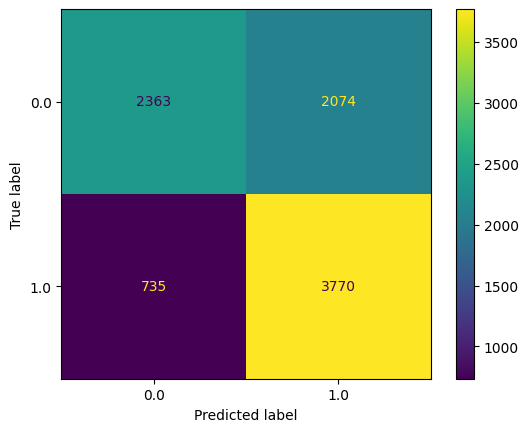

In [ ]:
# confusion matrix to visualize the results of the logistic regression model

log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

- lots of false positives, but other results look good

In [ ]:
# create a classification report that includes precision, recall, f1, and accuracy

target_labels = ['not verified','verified']
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

not verified       0.76      0.53      0.63      4437
    verified       0.65      0.84      0.73      4505

    accuracy                           0.69      8942
   macro avg       0.70      0.68      0.68      8942
weighted avg       0.70      0.69      0.68      8942



Precision (Verified = 0.65): Of the records predicted as "verified", 65% were correct.

Recall (Verified = 0.84): The model correctly identified 84% of actual "verified" videos — very strong recall.

Recall (Not Verified = 0.53): The model missed a significant portion of actual "not verified" videos — low recall here suggests many false positives.

✅ Overall Metrics:
Accuracy: 0.69
→ About 69% of total predictions were correct.

Macro Avg:

Averages precision, recall, and F1 equally across classes

Precision: 0.70, Recall: 0.68, F1: 0.68

Weighted Avg:

Averages each metric weighted by class size

Same values here as macro, which suggests class sizes are fairly balanced after resampling.

🧠 Interpretation:
The model is better at detecting verified videos (high recall), but less reliable at correctly identifying not verified ones.

You're likely seeing a lot of false positives for "verified" — meaning the model often predicts "verified" when it's not.

F1 score for verified (0.73) is strong, which is good if your goal is to catch verified videos.

If false positives for "verified" are costly or problematic, you might consider:

Tuning the decision threshold

Using precision-recall curves

Exploring model calibration or regularization

In [ ]:
# get the feature names from the model and the model coefficients which represent the log-odds ratios and place into dataframe for readability

pd.DataFrame(data={'feature name':log_clf.feature_names_in_, 'coefficient':log_clf.coef_[0]})

,feature name,coefficient
0,video_duration_sec,-8.610954e-04
1,video_view_count,-1.807638e-07
2,video_share_count,5.098072e-06
3,video_download_count,-1.080271e-04
4,video_comment_count,5.235805e-04
5,claim_status_opinion,1.682387e+00
6,author_ban_status_banned,-3.795327e-01
7,author_ban_status_under review,-1.259467e-01


Most impactful positive predictor: claim_status_opinion — very strong indicator of verified status.

Most impactful negative predictors: author_ban_status_banned and under review — major red flags for verification.

Engagement metrics (views, shares, comments) have small coefficients, suggesting weak direct influence or possible collinearity.